In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
import pandas as pd
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Linear Regression Model

## Data Preparation

### Loading data and splitting into training and test data

In [30]:
boston = datasets.load_boston()
bos_df = pd.DataFrame(boston.data)
bos_df.columns = boston.feature_names
bos_df['PRICE'] = boston.target

In [31]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
# X, y = bos_df.data, bos_df.target

X1 = bos_df['LSTAT']
X2 = bos_df['RM']

X = np.array(list(zip(X1, X2)))
y = bos_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(354, 2)
(152, 2)


### Scaling data before input

In [37]:
sc_x = MinMaxScaler()
sc_x.fit(X_train)
sc_x.transform(X_test)

sc_y = MinMaxScaler()
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
sc_y.fit(y_train)
sc_y.transform(y_test)

array([[0.39111111],
       [1.        ],
       [0.4       ],
       [0.07333333],
       [0.36      ],
       [0.33111111],
       [0.34666667],
       [0.30444444],
       [0.24666667],
       [0.30222222],
       [0.08444444],
       [0.27111111],
       [0.22      ],
       [0.12222222],
       [1.        ],
       [0.53333333],
       [0.4       ],
       [0.62888889],
       [0.54222222],
       [0.35555556],
       [0.41777778],
       [0.31333333],
       [0.34222222],
       [0.53555556],
       [0.31777778],
       [0.40222222],
       [0.32444444],
       [0.32      ],
       [0.74888889],
       [0.30444444],
       [0.21333333],
       [0.33333333],
       [0.34444444],
       [0.33555556],
       [0.41333333],
       [0.26222222],
       [0.01333333],
       [1.        ],
       [0.21111111],
       [0.18444444],
       [0.42      ],
       [0.33333333],
       [0.32888889],
       [0.19555556],
       [0.25555556],
       [0.36888889],
       [0.34      ],
       [0.266

## Building Model

In [43]:
def build_model():
    model = Sequential()
    model.add(Dense(15, input_dim = 2, kernel_initializer='normal'))
    model.add(Activation('linear'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
    return model

In [44]:
model = build_model()

def fit_model():
    return model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

In [45]:
def model_predict():
    y_pred = model.predict(X_test)
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [46]:
def keras_nn():
    model = build_model()
    fit_model()
    model_predict()

Train on 283 samples, validate on 71 samples
Epoch 1/150
283/283 [==============================] - 0s 1ms/step - loss: 655.4874 - mean_squared_error: 655.4874 - val_loss: 604.2588 - val_mean_squared_error: 604.2588
Epoch 2/150
283/283 [==============================] - 0s 38us/step - loss: 629.7797 - mean_squared_error: 629.7797 - val_loss: 580.0064 - val_mean_squared_error: 580.0064
Epoch 3/150
283/283 [==============================] - 0s 75us/step - loss: 604.8578 - mean_squared_error: 604.8578 - val_loss: 556.5053 - val_mean_squared_error: 556.5053
Epoch 4/150
283/283 [==============================] - 0s 64us/step - loss: 580.8289 - mean_squared_error: 580.8289 - val_loss: 533.8507 - val_mean_squared_error: 533.8507
Epoch 5/150
283/283 [==============================] - 0s 62us/step - loss: 557.6103 - mean_squared_error: 557.6103 - val_loss: 512.0406 - val_mean_squared_error: 512.0406
Epoch 6/150
283/283 [==============================] - 0s 57us/step - loss: 535.0411 - mean_squa

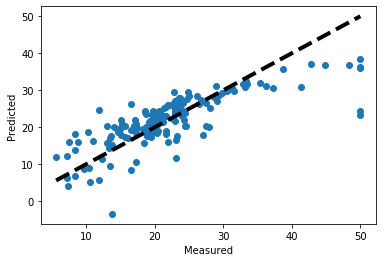

In [47]:
keras_nn()

# Logistic Regression

## Data Preparation

### Loading data and splitting into training and test data

In [5]:
#load in dataset
df_2 = pd.read_csv('./datasets/diabetes.csv')
df_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df_2.loc[:, df_2.columns != 'Outcome']
y = df_2.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [8]:
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


### Scaling data before input

In [9]:
sc_x = MinMaxScaler()
sc_x.fit(X_train)
sc_x.transform(X_test)

array([[0.05882353, 1.00505051, 0.62295082, ..., 0.63934426, 0.56078767,
        0.01666667],
       [0.11764706, 0.54040404, 0.60655738, ..., 0.50074516, 0.1369863 ,
        0.03333333],
       [0.23529412, 0.38383838, 0.50819672, ..., 0.50670641, 0.13142123,
        0.06666667],
       ...,
       [0.05882353, 0.47979798, 0.49180328, ..., 0.3561848 , 0.07534247,
        0.01666667],
       [0.05882353, 0.53535354, 0.62295082, ..., 0.55886736, 0.04837329,
        0.08333333],
       [0.58823529, 0.61616162, 0.63934426, ..., 0.41132638, 0.18321918,
        0.4       ]])

### Building Model

In [11]:
def build_log_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal'))
    model.add(Activation('softmax'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    return modelz

In [36]:
def log_nn():
    model = build_log_model()
    fit_model()

In [37]:
log_nn()

Train on 429 samples, validate on 108 samples
Epoch 1/150
429/429 [==============================] - 0s 282us/step - loss: 0.6419 - acc: 0.6503 - val_loss: 0.6609 - val_acc: 0.6389
Epoch 2/150
429/429 [==============================] - 0s 60us/step - loss: 0.6416 - acc: 0.6503 - val_loss: 0.6653 - val_acc: 0.6296
Epoch 3/150
429/429 [==============================] - 0s 47us/step - loss: 0.6423 - acc: 0.6480 - val_loss: 0.6624 - val_acc: 0.6389
Epoch 4/150
429/429 [==============================] - 0s 51us/step - loss: 0.6426 - acc: 0.6503 - val_loss: 0.6567 - val_acc: 0.6389
Epoch 5/150
429/429 [==============================] - 0s 48us/step - loss: 0.6421 - acc: 0.6480 - val_loss: 0.6630 - val_acc: 0.6296
Epoch 6/150
429/429 [==============================] - 0s 52us/step - loss: 0.6419 - acc: 0.6503 - val_loss: 0.6572 - val_acc: 0.6389
Epoch 7/150
429/429 [==============================] - 0s 49us/step - loss: 0.6418 - acc: 0.6503 - val_loss: 0.6600 - val_acc: 0.6389
Epoch 8/150
429